In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

/home/ahmad/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
#generate dataset 
X, y = make_classification(n_samples=1000, n_features=15, n_informative=10, n_redundant=2, n_clusters_per_class=1, weights=[0.9], flip_y=0, random_state=42)
 
df = pd.DataFrame(X, columns=[f'fitur_{i}' for i in range(1, 16)])
df['target'] = y
df['fitur_12'] = np.random.choice(['A', 'B', 'C'], size=1000)
df['fitur_13'] = np.random.choice(['X', 'Y', 'Z'], size=1000)

df


,fitur_1,fitur_2,fitur_3,fitur_4,fitur_5,fitur_6,fitur_7,fitur_8,fitur_9,fitur_10,fitur_11,fitur_12,fitur_13,fitur_14,fitur_15,target
0,0.093303,-3.472520,-1.314199,3.525743,0.642138,2.247328,3.067502,1.146301,-2.173112,2.765828,-1.821258,A,Z,1.005559,-0.276558,0
1,-0.189574,-1.770842,-1.578851,-1.372201,-2.025230,0.518655,-0.764750,-3.958705,-0.598147,1.018789,4.194233,B,Z,-0.243630,0.285979,0
2,0.916269,-2.051770,3.631998,0.824844,1.674093,-0.436273,-0.460407,0.031633,-1.140149,2.069694,1.935251,A,Y,2.486020,-2.867291,0
3,-0.914665,-1.608657,-0.735184,-1.742743,-1.753532,0.383412,-1.057937,-2.897416,-0.830328,1.572469,5.334621,B,X,-0.788215,1.255376,0
4,-0.756784,-2.362885,-3.909120,-0.474571,-4.029843,0.947114,0.581146,-3.435229,-2.142380,2.332385,3.816539,B,X,0.712335,2.810524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.927482,-0.017325,4.884411,0.542628,3.033376,-1.904407,0.953035,1.278882,-1.293396,1.772169,-1.191263,A,Z,-0.387151,-2.629004,0
996,0.347761,-1.690916,5.949207,-2.289729,2.238469,-0.067922,-0.069702,-1.436622,-2.153011,-0.867583,3.962758,A,Y,0.886822,-1.248408,0
997,1.201967,-1.263417,-1.331925,-2.468434,1.777577,2.270456,-0.431749,-1.846263,1.753033,1.858452,4.264568,C,Z,0.067260,0.931995,1
998,-2.127846,-0.975838,0.279144,0.151578,-0.443749,0.650616,-1.410265,-1.017319,-0.643070,2.142898,3.399255,B,Y,-0.128774,0.800834,0


In [3]:
x = df.drop('target', axis=1)
y = df['target']

print('Distribusi kelas sebelum SMOTE:', Counter(y))


Distribusi kelas sebelum SMOTE: Counter({0: 901, 1: 99})


In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
X_integer = x.drop(['fitur_12', 'fitur_13'], axis=1)
rf_model.fit(X_integer, y)

#mendapatkan fitur penting
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

#menentuka ambang batas untuk fitur penting 
treshold = 0.05
important_features_indices = [i for i in range(len(feature_importances)) if feature_importances[i] >= treshold]

#menampilkan fitur penting beserta nilainya
for i in important_features_indices:
    print(f'{X_integer.columns[i]} : {feature_importances[i]}')

#mendapatkan kolom dengan fitur penting 
important_features = X_integer.columns[important_features_indices]

#memnindah ke variabel baru
x_important = X_integer[important_features]
x_important

x_important.shape

fitur_2 : 0.11860019897866206
fitur_3 : 0.06878603593465271
fitur_5 : 0.07731131335837178
fitur_8 : 0.050482655781999855
fitur_9 : 0.2625049418105367
fitur_10 : 0.08958259568334655
fitur_11 : 0.06365230544114515
fitur_15 : 0.12578161860669113


(1000, 8)

In [5]:
x_selected = pd.concat([x_important, x['fitur_12']], axis=1)
x_selected = pd.concat([x_selected, x['fitur_13']], axis=1)

x_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,A,Z
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,B,Z
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,A,Y
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,B,X
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,B,X
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,A,Z
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,A,Y
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,C,Z
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,B,Y


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

x_selected['fitur_12'] = le.fit_transform(x_selected['fitur_12'])
x_selected['fitur_13'] = le.fit_transform(x_selected['fitur_13'])


In [7]:
numeric_columns = x_selected.select_dtypes('number').columns
numeric_columns = x_selected.drop(['fitur_12', 'fitur_13'], axis=1)

x_cleaned = x_important.copy()

In [8]:
x_cleaned

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [9]:
x_selected

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15,fitur_12,fitur_13
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558,0,2
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979,1,2
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291,0,1
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376,1,0
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524,1,0
...,...,...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004,0,2
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408,0,1
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995,2,2
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834,1,1


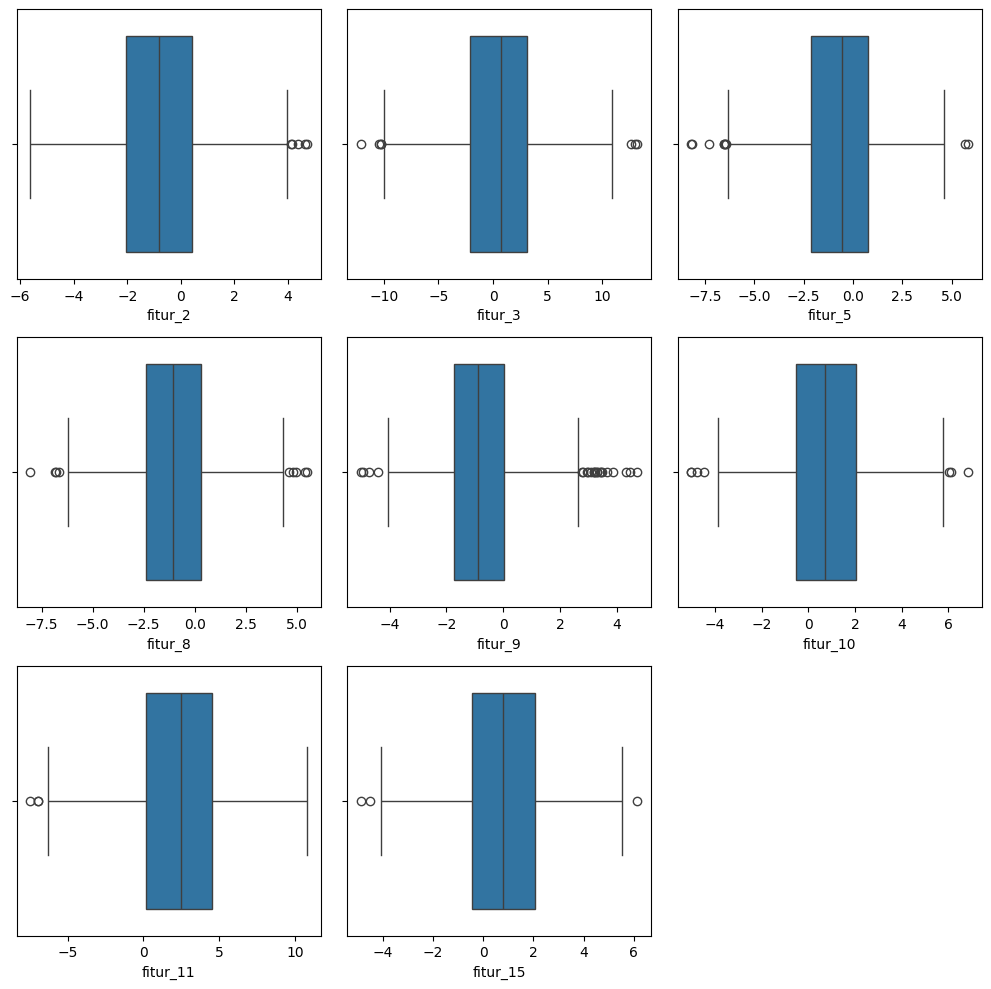

In [10]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(x_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=x_cleaned[col])
plt.tight_layout()

In [11]:
q1 = x_important[numeric_columns.columns].quantile(0.25)
q3 = x_important[numeric_columns.columns].quantile(0.75)

iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

outlier = ~((x_cleaned[numeric_columns.columns] < lower) | (x_cleaned[numeric_columns.columns] > upper)).any(axis=1)


x_cleaned = x_cleaned.loc[outlier, numeric_columns.columns]
y = y.loc[x_cleaned.index]


In [12]:
x_cleaned

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-3.472520,-1.314199,0.642138,1.146301,-2.173112,2.765828,-1.821258,-0.276558
1,-1.770842,-1.578851,-2.025230,-3.958705,-0.598147,1.018789,4.194233,0.285979
2,-2.051770,3.631998,1.674093,0.031633,-1.140149,2.069694,1.935251,-2.867291
3,-1.608657,-0.735184,-1.753532,-2.897416,-0.830328,1.572469,5.334621,1.255376
4,-2.362885,-3.909120,-4.029843,-3.435229,-2.142380,2.332385,3.816539,2.810524
...,...,...,...,...,...,...,...,...
995,-0.017325,4.884411,3.033376,1.278882,-1.293396,1.772169,-1.191263,-2.629004
996,-1.690916,5.949207,2.238469,-1.436622,-2.153011,-0.867583,3.962758,-1.248408
997,-1.263417,-1.331925,1.777577,-1.846263,1.753033,1.858452,4.264568,0.931995
998,-0.975838,0.279144,-0.443749,-1.017319,-0.643070,2.142898,3.399255,0.800834


In [13]:
len(x_cleaned), len(y)

(949, 949)

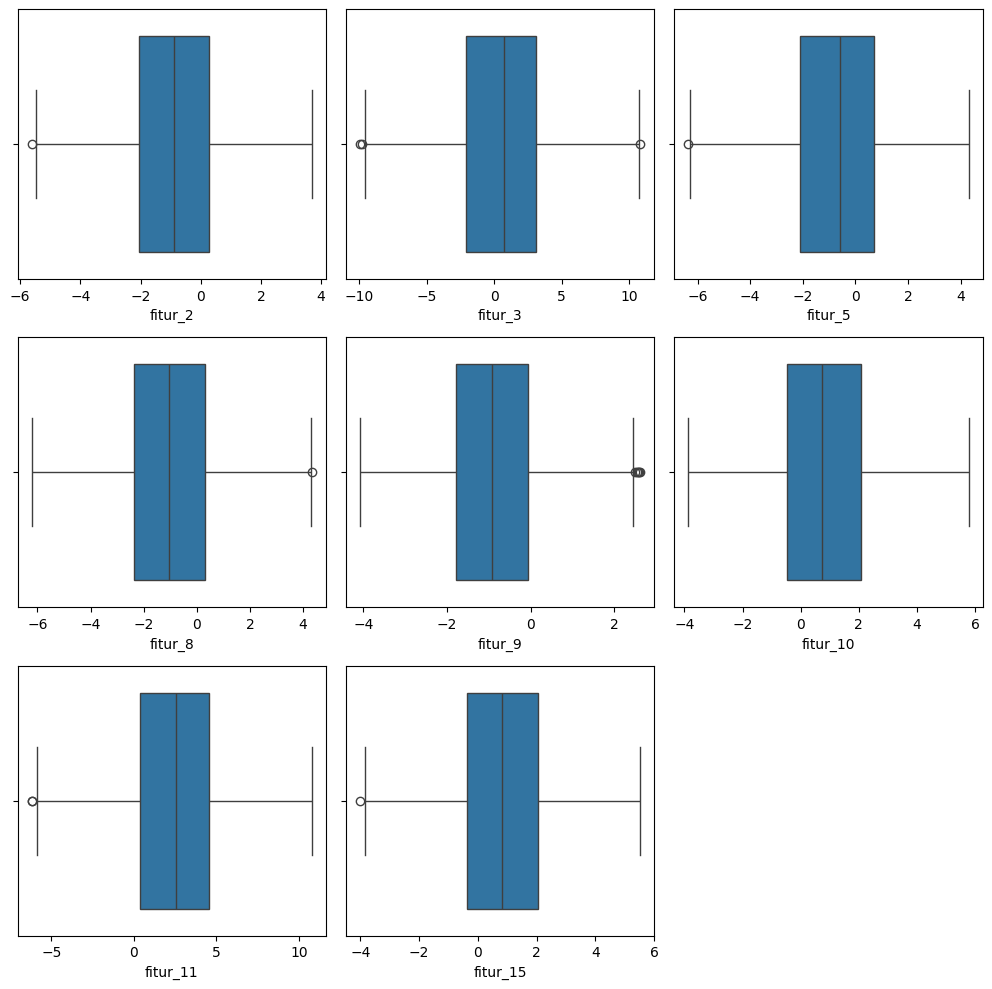

In [15]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(x_cleaned):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=x_cleaned[col])
plt.tight_layout()

In [26]:
smote = SMOTE(random_state=42)

x_resampled, y_resampled = smote.fit_resample(x_cleaned, y)


#menampilkan distribusi kelas setelah SMOTE
print(f'Distribusi kelas setelah SMOTE : {Counter(y_resampled)}')

#mengubah menjadi dataframe
x_resampled = pd.DataFrame(x_resampled)
y_resampled = pd.Series(y_resampled, name='Target')

Distribusi kelas setelah SMOTE : Counter({0: 875, 1: 875})


In [27]:
x_resampled
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
1745    1
1746    1
1747    1
1748    1
1749    1
Name: Target, Length: 1750, dtype: int64

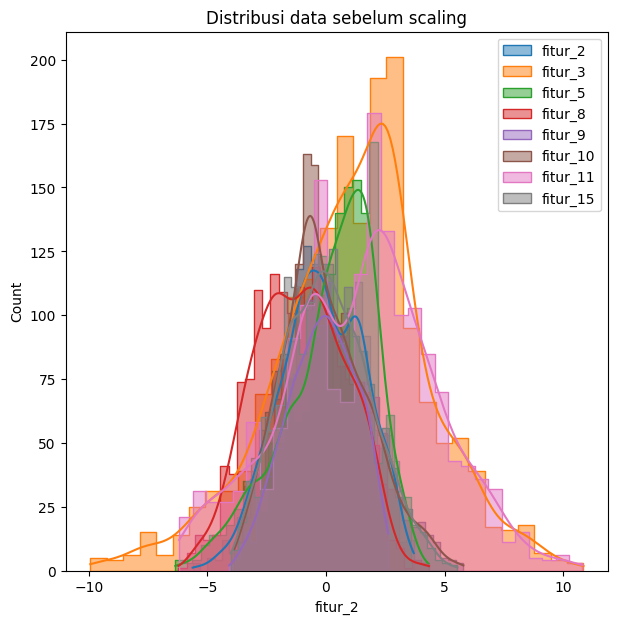

In [36]:
plt.figure(figsize=(7, 7))
for i in x_resampled.columns:
    sns.histplot(x_resampled[i], kde=True, label=i, bins=30, element='step')
    plt.title('Distribusi data sebelum scaling')
plt.legend()
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_resampled[important_features] = scaler.fit_transform(x_resampled)

In [40]:
x_resampled

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
0,-1.901503,-0.727429,0.243840,1.154880,-1.420918,1.533794,-1.006477,-0.177863
1,-0.919361,-0.808862,-1.145007,-1.521662,-0.301437,0.567300,0.878054,0.136200
2,-1.081501,0.794512,0.781160,0.570462,-0.686691,1.148680,0.170361,-1.624266
3,-0.825754,-0.549266,-1.003539,-0.965231,-0.466471,0.873606,1.235314,0.677413
4,-1.261065,-1.525884,-2.188770,-1.247205,-1.399074,1.294006,0.759730,1.545650
...,...,...,...,...,...,...,...,...
1745,0.486460,-0.148291,0.358923,0.275403,0.266741,-0.616835,-1.435760,-0.953884
1746,0.058213,-0.154402,0.548987,1.489495,-1.660757,-1.261695,-1.846308,0.472353
1747,0.622814,0.676630,0.458460,0.060087,-1.136417,-0.394793,-1.881159,-1.480411
1748,1.028500,0.470549,0.110114,-0.938910,0.876436,-0.650595,-0.734213,-1.906607


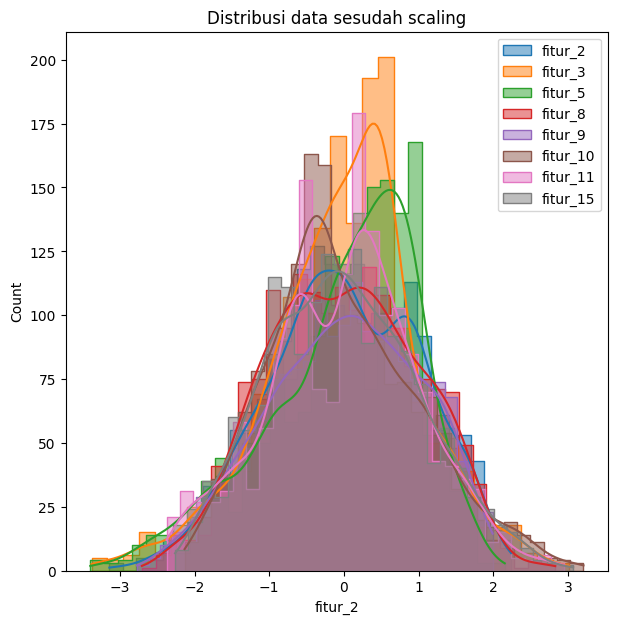

In [42]:
plt.figure(figsize=(7, 7))
for i in x_resampled.columns:
    sns.histplot(x_resampled[i], kde=True, label=i, bins=30, element='step')
    plt.title('Distribusi data sesudah scaling')
plt.legend()
plt.show()

In [43]:
x_resampled.describe()

,fitur_2,fitur_3,fitur_5,fitur_8,fitur_9,fitur_10,fitur_11,fitur_15
count,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1.750000e+03,1750.000000,1.750000e+03,1.750000e+03
mean,3.248195e-17,-2.436147e-17,3.248195e-17,-4.060244e-18,3.248195e-17,0.000000,6.496391e-17,-9.744586e-17
std,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286e+00,1.000286,1.000286e+00,1.000286e+00
min,-3.140254e+00,-3.378635e+00,-3.395160e+00,-2.705454e+00,-2.773574e+00,-2.133851,-2.375105e+00,-2.260982e+00
25%,-6.753646e-01,-6.026534e-01,-5.875147e-01,-7.350120e-01,-7.296781e-01,-0.686312,-6.562131e-01,-7.685301e-01
50%,7.019504e-03,6.064925e-02,1.916188e-01,4.347537e-03,4.743591e-02,-0.156897,9.778137e-02,-3.796866e-02
75%,7.859312e-01,5.800266e-01,7.374792e-01,7.330751e-01,7.741500e-01,0.660824,6.644054e-01,6.967193e-01
max,2.237440e+00,3.015720e+00,2.152233e+00,2.828207e+00,1.990205e+00,3.206305,2.949236e+00,3.067800e+00
